In [53]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import FixedLocator

def arg(z):
    ans = np.arctan2(z[1],z[0])
    if ans<0:
        return ans+2*np.pi
    else:
        return ans

In [54]:
def step_mat(K,dt):
    if K<0:
        return np.array([[np.cosh(dt*np.sqrt(-K)),np.sqrt(-K)*np.sinh(dt*np.sqrt(-K))],[1/np.sqrt(-K)*np.sinh(dt*np.sqrt(-K)),np.cosh(dt*np.sqrt(-K))]])
    if K==0:
        return np.array([[1,0],[dt,1]])
    if K>0:
        return np.array([[np.cos(dt*np.sqrt(K)),-np.sqrt(K)*np.sin(dt*np.sqrt(K))],[1/np.sqrt(K)*np.sin(dt*np.sqrt(K)),np.cos(dt*np.sqrt(K))]])

In [3]:
step_mat(1,0.4)

array([[ 0.92106099, -0.38941834],
       [ 0.38941834,  0.92106099]])

Введите K: 1.5


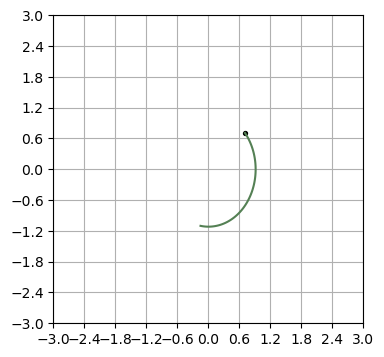

In [59]:
K = float(input('Введите K: '))
N = 100
Tmax = 2
lim = 3
B = step_mat(K,Tmax/N)
T = np.linspace(0,Tmax,101)
z = np.zeros((N,2))
z[0] = [2**0.5 / 2, 2**0.5 / 2]
for i in range(N)[1:]:
    z[i] = z[i-1] @ B


fig = plt.figure(figsize=(4,4))
ax = fig.add_subplot()
ax.set(xlim=(-lim,lim),ylim=(-lim,lim))
ax.scatter([z[0,0]],[z[0,1]],s=8,c='black')
ax.plot(z[:,0],z[:,1],c=(0.33,0.5,0.33))
ax.grid()
ax.xaxis.set_major_locator(FixedLocator(np.linspace(-lim,lim,11)))
ax.yaxis.set_major_locator(FixedLocator(np.linspace(-lim,lim,11)))
plt.show()

In [77]:
M = 50
N = 100
MN = M*N
z = np.zeros((MN+1,2))
PHI = np.zeros(M+1)
K_mem = np.zeros(M+1)
z[0] = [0,1]
PHI[0] = arg([z[0,1],z[0,0]])
Kmin = -1
Kmax = 1

for i in range(MN+1)[1:]:
    if i%N==0 or i==1:
        #K = np.random.uniform(Kmin,Kmax)
        K = np.random.choice([-1,1])
        K_mem[int(i/N)] = K
        B = step_mat(K,1/N)
    z[i] = z[i-1] @ B
    if i%N==0:
        PHI[int(i/N)] = arg([z[i,1],z[i,0]])

for i in range(MN+1):
    z[i,1] *= 1/100

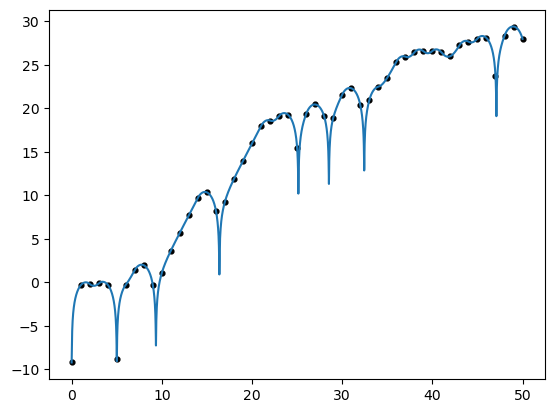

In [78]:
X = np.linspace(0,M,MN+1)
Y = z.T[0]
Y1 = z.T[1]
Z = np.log(Y*Y+Y1*Y1)
#lY = np.log(Y*Y+0.00001)
plt.plot(X,Z)
#plt.plot(X,lY)
plt.scatter(X[::N],Z[::N],s=12,c='black')
plt.show()

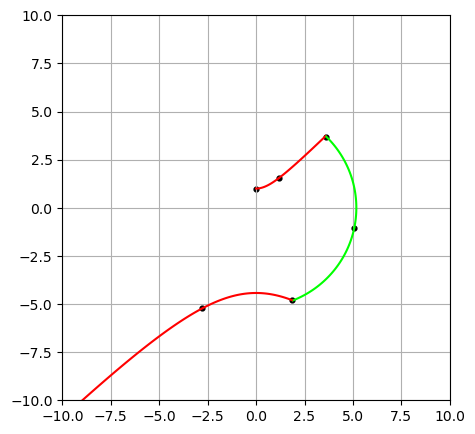

In [68]:
lim = 10
mm = M
fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot()
ax.set(xlim = (-lim,lim),ylim=(-lim,lim))
ax.grid()

for m in range(mm):
    plt.plot(z[m*N:(m+1)*N,0],100*z[m*N:(m+1)*N,1],c=((K_mem[m]-Kmax)/(Kmin-Kmax),(Kmin-K_mem[m])/(Kmin-Kmax),0))
    #plt.plot(z[m*N:(m+1)*N,0],z[m*N:(m+1)*N,1],c=((1-K_mem[m])/2,(1+K_mem[m])/2,0))
    
plt.scatter(z[::N,0],100*z[::N,1],c='black',s=12)
#plt.scatter(z[::N,0],z[::N,1],c='black',s=12)
plt.show()

In [45]:
K_mem

array([ 0.86086792,  0.24770573, -0.33638428,  0.80332447, -0.60161568,
       -0.73451016,  0.61243112, -0.01367901, -0.14632079, -0.09337061,
       -0.54393593, -0.44120616, -0.36929356,  0.27974053,  0.16682424,
        0.95294447, -0.73129598,  0.36740927, -0.07432595, -0.25382715,
        0.03906017, -0.31167865,  0.03910589, -0.15119729, -0.52666981,
       -0.17680138,  0.18995367, -0.33730533,  0.7253823 , -0.71194988,
        0.64963511, -0.75156503, -0.42490082, -0.42735506,  0.03261668,
       -0.21001438,  0.28568777, -0.68205905,  0.96058011,  0.74967489,
       -0.83394692,  0.38840905, -0.83124208, -0.73231963,  0.62439534,
       -0.28978715,  0.16700558,  0.60089031,  0.75357494, -0.81384762,
        0.8512485 ])

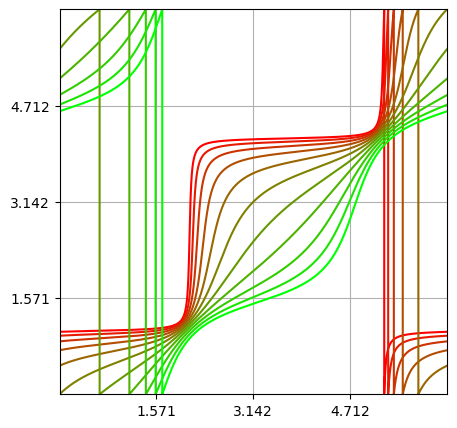

In [79]:
N = 10000
phirange = np.linspace(0,2*np.pi,N)
v = np.array([[np.cos(phi),np.sin(phi)] for phi in phirange])

fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot()
ax.set(xlim=(0,2*np.pi),ylim=(0,2*np.pi))
ax.grid()
ax.xaxis.set_major_locator(FixedLocator([np.pi/2,np.pi,3*np.pi/2]))
ax.yaxis.set_major_locator(FixedLocator([np.pi/2,np.pi,3*np.pi/2]))

Kmin = -3
Kmax = 3
Ksetsize = 11
#Kset = np.linspace(-1,1,11)
Kset = np.linspace(Kmin,Kmax,Ksetsize)
for K in Kset:
    B = step_mat(K,1)
    w = v @ B
    plt.plot([arg(v[i]) for i in range(N)],[arg(w[i]) for i in range(N)],c=((K-Kmax)/(Kmin-Kmax),(Kmin-K)/(Kmin-Kmax),0))

plt.show()

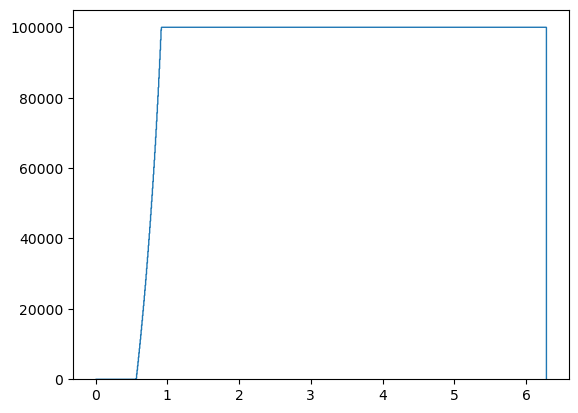

In [44]:
phi = np.pi/2
z = np.array([np.cos(phi),np.sin(phi)])
N = 100000
PSI = np.zeros(N)
for i in range(N):
    K = np.random.uniform(-1,1)
    #print('K',K)
    B = step_mat(K,1.0)
    z1 = z @ B
    PSI[i] = arg(z1)
plt.hist(PSI,np.linspace(0,2*np.pi,1000),cumulative=True,histtype='step')
plt.show()

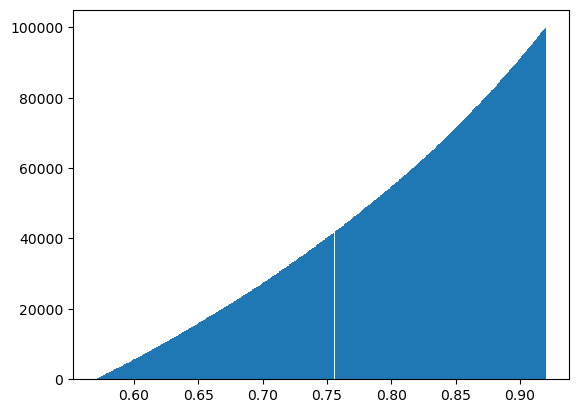

In [45]:
import scipy.stats
res = scipy.stats.cumfreq(PSI,500)
x = res.lowerlimit + np.linspace(0, res.binsize*res.cumcount.size,res.cumcount.size)
plt.bar(x, res.cumcount, width=res.binsize)
plt.show()

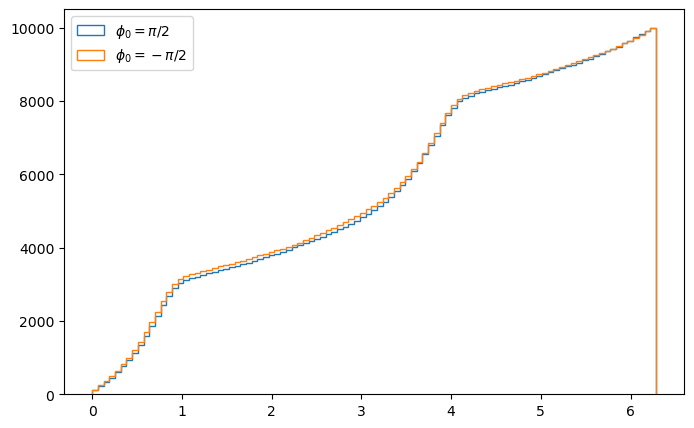

In [88]:
N = 10000

fig = plt.figure(figsize = (8,5))
ax = fig.add_subplot()
#ax.set(xlim = (0,2*np.pi), ylim=(0,N))

phi = np.pi/2
z = np.array([np.cos(phi),np.sin(phi)])
PSI = np.zeros(N)
for i in range(N):
    K = np.random.normal(0,1)
    B = step_mat(K,1.0)
    z = z @ B
    PSI[i] = arg(z)
    z = z/np.linalg.norm(z)
ax.hist(PSI,np.linspace(0,2*np.pi,100),cumulative=True,histtype='step',label = '$\phi_0 = \pi/2$')

phi = -np.pi/2
z = np.array([np.cos(phi),np.sin(phi)])
for i in range(N):
    K = np.random.normal(0,1)
    B = step_mat(K,1.0)
    z = z @ B
    PSI[i] = arg(z)
    z = z/np.linalg.norm(z)
ax.hist(PSI,np.linspace(0,2*np.pi,100),cumulative=True,histtype='step',label = '$\phi_0 = -\pi/2$')

ax.legend()
plt.show()

In [85]:
PSI/N

array([3.65856438e-04, 3.15917848e-04, 1.74986372e-04, ...,
       1.25166105e-04, 5.82420768e-05, 6.04778702e-04])